# SBERT Documentation
Next, I took a look at the [SBERT documentation](https://sbert.net/). Note that a lot of the code below is copied from there.

In [26]:
# This is their initial example to show how easy SBERT is
# DONE: To know which model to use, take a look at those descriptions: https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
#
# #Our sentences we like to encode
# sentences = ['This framework generates embeddings for each input sentence',
#     'Sentences are passed as a list of string.',
#     'The quick brown fox jumps over the lazy dog.']
#
# #Sentences are encoded by calling model.encode()
# embeddings = model.encode(sentences)
#
# #Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

# Comparing results

In [27]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences are encoded by calling model.encode()
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("Have you seen my red cat?")
emb3 = model.encode("I am a student at the university of Antwerp")
emb4 = model.encode("Information retrieval is given at our university")
emb5 = model.encode("Studying at the university of Antwerp is great")
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)
print(f"Cosine-Similarity not similar sentence: {util.cos_sim(emb1, emb3)}")
print(f"Cos-Sim of own similar sentences: {util.cos_sim(emb3, emb4)}")
print(f"Cos-Sim of own more similar sentences: {util.cos_sim(emb3, emb5)}")

Cosine-Similarity: tensor([[0.6153]])
Cosine-Similarity not similar sentence: tensor([[-0.0356]])
Cos-Sim of own similar sentences: tensor([[0.3480]])
Cos-Sim of own more similar sentences: tensor([[0.8072]])


In [28]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

# TODO: For training own embeddings, I have to take a look here: https://sbert.net/docs/training/overview.html

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


# Pretrained models
Currently on [this page](https://sbert.net/docs/pretrained_models.html) of the tutorial.

By reading the description of the models, those where the one that seemed interesting to me:
- multi-qa-mpnet-base-dot-v1:   This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
- multi-qa-distilbert-cos-v1: 	This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs. (twice as fast as the one above)
- multi-qa-MiniLM-L6-cos-v1: 	This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs. (six times as fast as the first one)
- all-mpnet-base-v2: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
- all-MiniLM-L12-v2: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs. (the faster version)

## Semantic search
There are also more models trained specifically on semantic search, which is what we need.

In [29]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district',
                                  'I like trains',
                                  'London is very large',
                                  'London is bigger than Middelheim'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Similarity: tensor([[0.5472, 0.6330, 0.0656, 0.9003, 0.6642]])


### Multi-QA Models
Those where the first three mentioned from my list above and have been trained on 215M question-answer pairs from various sources and domains, including StackExchange, Yahoo Answers, Google & Bing search queries and many more. These model perform well across many search tasks and domains accoording to the site, so I definetly have to try them.

#### Bing dataset
- msmarco-bert-base-dot-v5

Since all our documents are in English, we don't need multi-lingual models.

## Pretrained cross-encoders

In [30]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2-v2', max_length=512)
scores = model.predict([('Query1', 'Paragraph1'), ('Query1', 'Paragraph2')])

#For Example
scores = model.predict([('How many people live in Berlin?', 'Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.'),
                        ('How many people live in Berlin?', 'Berlin is well known for its museums.')])
print(scores)
# TODO: Take a better look at Retrieve & Re-Rank: https://sbert.net/examples/applications/retrieve_rerank/README.html

[ 7.1523705 -6.287044 ]


In [31]:
# This is not useful for the assignment, but just seemed cool to me (also similar to the tutorials mentioned in the assignment)
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-distilroberta-base')
scores = model.predict([('A man is eating pizza', 'A man eats something'), ('A black race car starts up in front of a crowd of people.', 'A man is driving down a lonely road.')])

# Convert scores to labels
label_mapping = ['contradiction', 'entailment', 'neutral']
labels = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]
print(labels)

['entailment', 'contradiction']


## References
Take a look [here](https://sbert.net/docs/publications.html) for the references, I think the only required citations I used are the repo and MSMacro.

# Computing embeddings
I'm currently on [this](https://sbert.net/examples/applications/computing-embeddings/README.html) tutorial page.
## Input sequence length
As mentioned in one of the earlier tutorial, the longer texts must be truncated.
>  Transformer models like BERT / RoBERTa / DistilBERT etc. the runtime and the memory requirement grows quadratic with the input length. This limits transformers to inputs of certain lengths. A common value for BERT & Co. are 512 word pieces, which corresponde to about 300-400 words (for English). Longer texts than this are truncated to the first x word pieces.

By default, there is a limit of 128 word pieces. Let's take a look at our length distribution graph mentioned in the previous tutorial:

In [32]:
# See how long the text information is
import pandas as pd
df = pd.read_csv("./data/training_data.csv")
# Note: Loading the dataframe is put in a different cell to prevent longer loads

avg. doc_len: 1812.0840857142857
max_seq_len: 5148


c:\users\arnod\pycharmprojects\neural-retrieval-bert\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


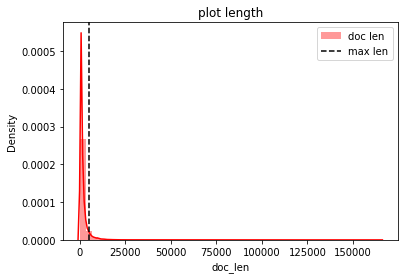

140000


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df['doc_len'] = df['doc_text'].apply(lambda words: len(str(words).split()))
print(f"avg. doc_len: {df['doc_len'].mean()}")
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
print(f"max_seq_len: {max_seq_len}")
sns.distplot(df['doc_len'], hist=True, kde=True, color='r', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()

# Get an idea of the number of entries:
index = df.index
number_of_rows = len(index)
print(f"Training data number of rows: {number_of_rows}")

As you can see, the average text length is 1812 words, by adding the standard deviation to this, we get a max_sequence length of 5148 (based on what the previous tutorial described as max sequence length), which is quite long for the models. We can however change the max length for a model, but this will lead to a lot longer times as described above, so this will be a challenge we'll have to face later on. Currently, we'll just assume the first 256 words of a document will contain enough information to determine whether it's relevant for a query.
> Note: You cannot increase the length higher than what is maximally supported by the respective transformer model. Also note that if a model was trained on short texts, the representations for long texts might not be that good

In [34]:
# Example of how to change the max sequence length
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

print("Max Sequence Length:", model.max_seq_length)

#Change the length to 200
model.max_seq_length = 5148

print("Max Sequence Length:", model.max_seq_length)

Max Sequence Length: 256
Max Sequence Length: 5148


## Storing & Loading embeddings
When we have made embeddings for all sentences, we can store and load them as follows:

In [35]:
from sentence_transformers import SentenceTransformer
import pickle

model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']


embeddings = model.encode(sentences)

#Store sentences & embeddings on disc
with open('embeddings.pkl', "wb") as fOut:
    pickle.dump({'sentences': sentences, 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

# Semantic search
I'm currently at [this](https://sbert.net/examples/applications/semantic-search/README.html) page of the tutorial.
As mentioned earlier, it is clear that we're having a case of Assymetric Search:
> For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

The [MsMacro models](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html) should be suitable for asymetric search.

Because we're working with longer passages, we'll follow this note and work with the models that are tuned to work with the dot product.
> Models tuned for cosine-similarity will prefer the retrieval of shorter passages, while models for dot-product will prefer the retrieval of longer passages. Depending on your task, you might prefer the one or the other type of model.

I'll use `msmarco-distilbert-base-tas-b` as model, since this seems the best option for our scenario accoording to the tutorial.

Both models are tuned to work with cosine-similarity

We've already seen that our training data contains 140.000 rows. Let's take a look at how many documents there are.
```shell
wc -l data/all_docs.csv
```
> 126204 data/all_docs.csv

This is a small corpora (less than 1 million entries), so we can probably compute the dot product for all documents.

Here's an example for semantic search from the tutorial:

In [37]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

SBERT also has a `sentence_transformers.util.semantic_search` function built in, which might be a better choice than performing the search manually like the code above.
More info can be found [here](https://sbert.net/examples/applications/semantic-search/README.html#sentence_transformers.util.semantic_search).

An example of Aproximate Nearest Neighbours (ANN) in case finding the exact top-k is too large, can be found [here](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_hnswlib.py).

An example of a retrieve-rerank on the wikipedia paragraphs can be found [here](https://sbert.net/examples/applications/semantic-search/README.html#question-answer-retrieval).

## Bi-encoder
This maps the query into the same vector space as your documents and loos at the nearest documents.

## Cross-encoder
Can be used for reranking the (e.g. 100) potentially irrelevant results from the Bi-encoder. This outputs a score between 0 and 1, representing how relevant the document is for the given query.
TODO: Continue from here: https://sbert.net/examples/applications/retrieve_rerank/README.html#example-scripts
